# HIỂN THỊ DANH SÁCH CÁC ẢNH CỦA TẬP DỮ LIỆU

1. Yêu cầu chung: Hiển thị một số ảnh trong bộ dữ liệu theo từng phân loại
  + Ví dụ minh họa:
  <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>
2. Yêu cầu cụ thể:
  - Input: tập tin .csv, trong đó mỗi dòng tương ứng với (đường dẫn) một ảnh và categoryID. Ví dụ tập tin CarDataset-Splits-1-Train.csv
  - Output: như hình minh họa ở trên, mỗi dòng tương ứng với một CategoryID, số lượng ảnh, kích thước ảnh là các tham số với giá trị mặc định như sau
    + NumImgsPerRow = 10
    + ImgHeight = ImgWidth = 150
  - Các ảnh mỗi dòng được chọn ngẫu nhiên ở mỗi lần chạy

3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline:

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

## Thông tin của tác giả, ngày cập nhật
Thành viên nhóm:


*   Tăng Gia Hân - 22520394
*   Tăng Mỹ Hân - 22520395


Ngày cập nhật: 15/12/2024

# Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CS114/Public

/content/drive/.shortcut-targets-by-id/1Uj0V9URNHpzSHeXHSB89AoGCjGki8Yra/Public


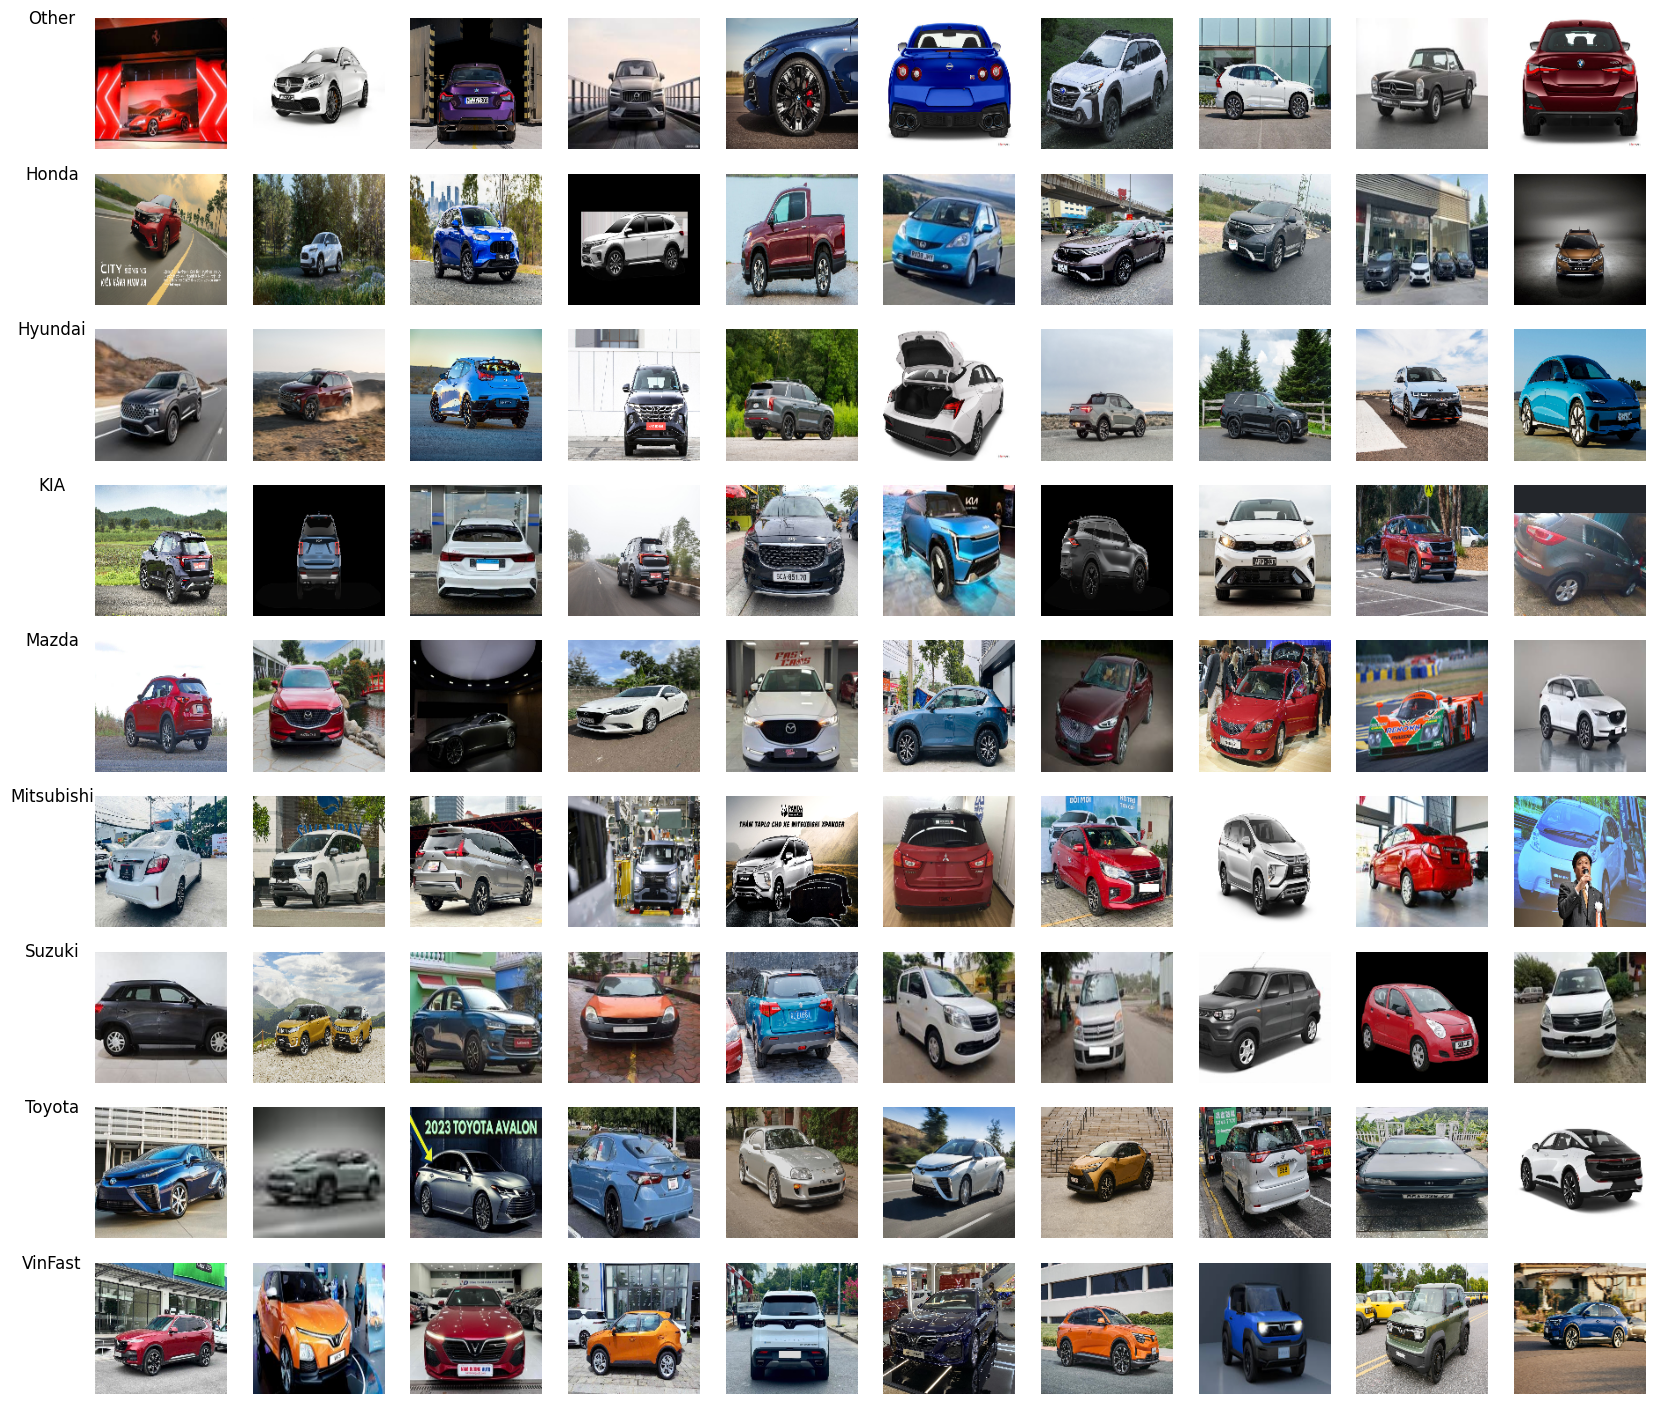

In [ ]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random

# Tạo từ điển ánh xạ CategoryID sang tên loại xe
category_mapping = {
    0: "Other",
    1: "Honda",
    2: "Hyundai",
    3: "KIA",
    4: "Mazda",
    5: "Mitsubishi",
    6: "Suzuki",
    7: "Toyota",
    8: "VinFast"
}

def display_images_by_category(csv_file, num_imgs_per_row=10, img_height=150, img_width=150):
    # Đọc dữ liệu từ file CSV
    data = pd.read_csv(csv_file)

    # Lấy danh sách các CategoryID duy nhất
    unique_categories = sorted(data["CategoryID"].unique())

    # Tạo một subplot lớn với số dòng bằng số CategoryID
    num_rows = len(unique_categories)
    fig, axes = plt.subplots(num_rows, num_imgs_per_row, figsize=(num_imgs_per_row * 2, num_rows * 2))
    plt.subplots_adjust(hspace=0.1)  # Điều chỉnh khoảng cách giữa các hàng

    # Nếu chỉ có 1 hàng, đảm bảo axes là mảng
    if num_rows == 1:
        axes = [axes]

    # Duyệt qua từng CategoryID và hiển thị ảnh
    for row_idx, category in enumerate(unique_categories):
        # Lọc các đường dẫn ảnh thuộc CategoryID hiện tại
        category_data = data[data["CategoryID"] == category]["ImageFullPath"].tolist()

        # Chọn ngẫu nhiên num_imgs_per_row ảnh
        random_imgs = random.sample(category_data, min(len(category_data), num_imgs_per_row))

        for col_idx in range(num_imgs_per_row):
            ax = axes[row_idx][col_idx] if num_rows > 1 else axes[col_idx]
            ax.axis('off')  # Tắt trục
            img_path = random_imgs[col_idx]
            if os.path.exists(img_path):
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (img_width, img_height))
                ax.imshow(img)

        # Ghi nhãn tên loại xe ở đầu hàng
        label = category_mapping.get(category, f"Unknown {category}")
        axes[row_idx][0].text(-50, 0.5, f"{label}", ha="center", va="center", fontsize=12, rotation=0)

    plt.show()

# Đường dẫn file CSV
csv_file = "/content/drive/MyDrive/Colab Notebooks/CS114/CarDataset.csv"

# Hiển thị ảnh
display_images_by_category(csv_file)
